# Correlation Analysis of Kindle Book Dataset: Technical Audience

### Import and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('kindle_data-v2.csv')


### Data Overview

In [5]:
# Display basic information about the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

In [7]:
# Initial exploration
print(data.head())

         asin                                              title  \
0  B00TZE87S4  Adult Children of Emotionally Immature Parents...   
1  B08WCKY8MB  From Strength to Strength: Finding Success, Ha...   
2  B09KPS84CJ  Good Inside: A Guide to Becoming the Parent Yo...   
3  B07S7QPG6J             Everything I Know About Love: A Memoir   
4  B00N6PEQV0  The Seven Principles for Making Marriage Work:...   

              author                    soldBy  \
0  Lindsay C. Gibson   Amazon.com Services LLC   
1   Arthur C. Brooks   Penguin Group (USA) LLC   
2      Becky Kennedy  HarperCollins Publishers   
3     Dolly Alderton  HarperCollins Publishers   
4       John Gottman          Random House LLC   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/713KZTsaYp...   
1  https://m.media-amazon.com/images/I/A1LZcJFs9E...   
2  https://m.media-amazon.com/images/I/71RIWM0sv6...   
3  https://m.media-amazon.com/images/I/71QdQpTiKZ...   
4  https:/

In [13]:
print(data.columns)

Index(['asin', 'title', 'author', 'soldBy', 'imgUrl', 'productURL', 'stars',
       'reviews', 'price', 'isKindleUnlimited', 'category_id', 'isBestSeller',
       'isEditorsPick', 'isGoodReadsChoice', 'publishedDate', 'category_name'],
      dtype='object')


### Data Preparation

In [67]:
# Convert publishedDate to datetime
data['publishedDate'] = pd.to_datetime(data['publishedDate'], errors='coerce')

# Handle missing values in numerical columns
data = data.dropna(subset=['price', 'stars', 'reviews', 'category_name'])

# Ensure price is numeric and handle non-numeric gracefully
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Ensure binary columns are boolean
binary_columns = ['isKindleUnlimited', 'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice']
for col in binary_columns:
    data[col] = data[col].astype(bool)

In [88]:
# Convert categorical variables to numerical codes
data['category_name'] = data['category_name'].astype('category').cat.codes
data['title'] = data['title'].astype('category').cat.codes
data['author'] = data['author'].astype('category').cat.codes
data['soldBy'] = data['soldBy'].astype('category').cat.codes
data['imgUrl'] = data['imgUrl'].astype('category').cat.codes
data['productURL'] = data['productURL'].astype('category').cat.codes
data['publishedDate'] = data['publishedDate'].astype('int64')  # Convert datetime to integer


### Data Exploration

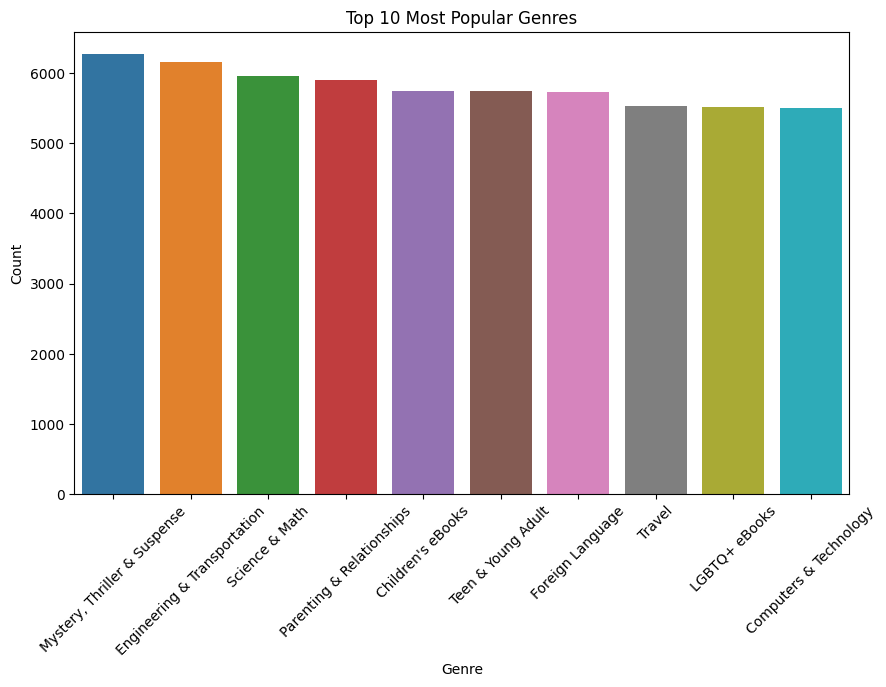

In [27]:
# Identify popular genres
popular_genres = data['category_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_genres.index, y=popular_genres.values)
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


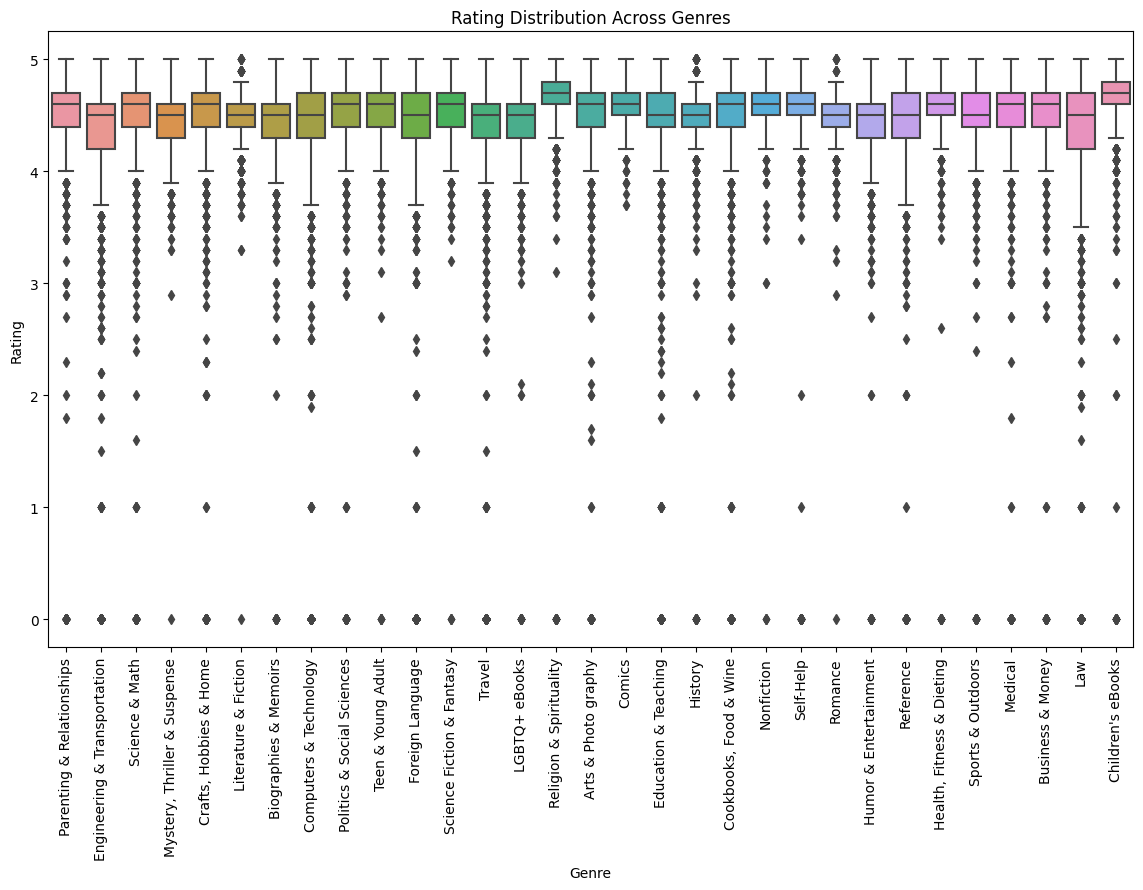

In [51]:

# Distribution of ratings across genres
plt.figure(figsize=(14, 8))
sns.boxplot(x='category_name', y='stars', data=data)
plt.title('Rating Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


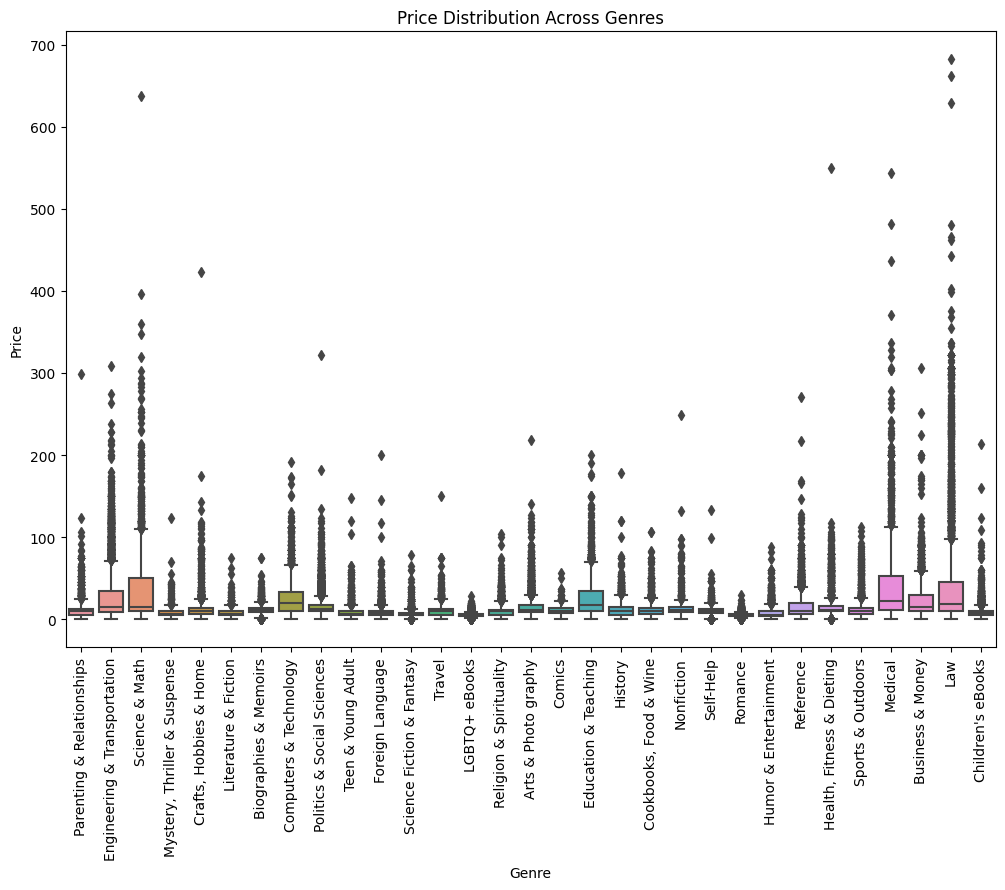

In [29]:
# Price distribution across genres
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_name', y='price', data=data)
plt.title('Price Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()


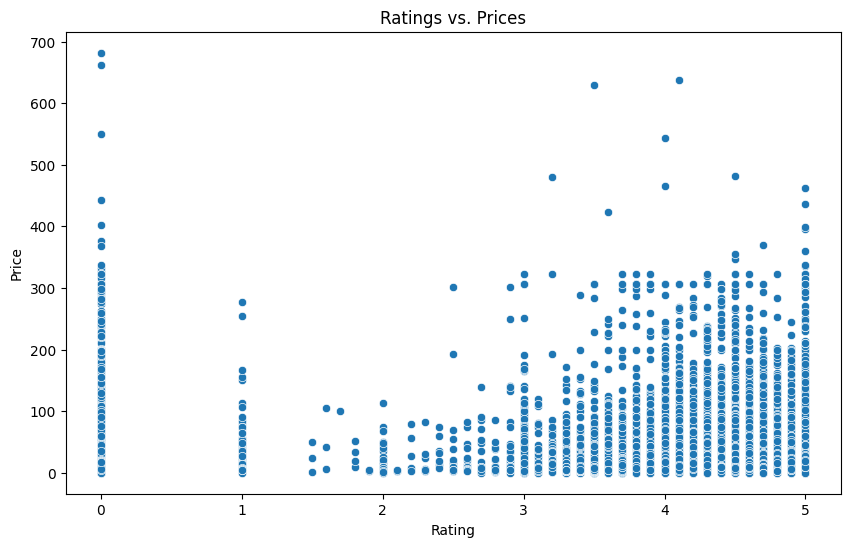

In [31]:
# Ratings vs. Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=data)
plt.title('Ratings vs. Prices')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


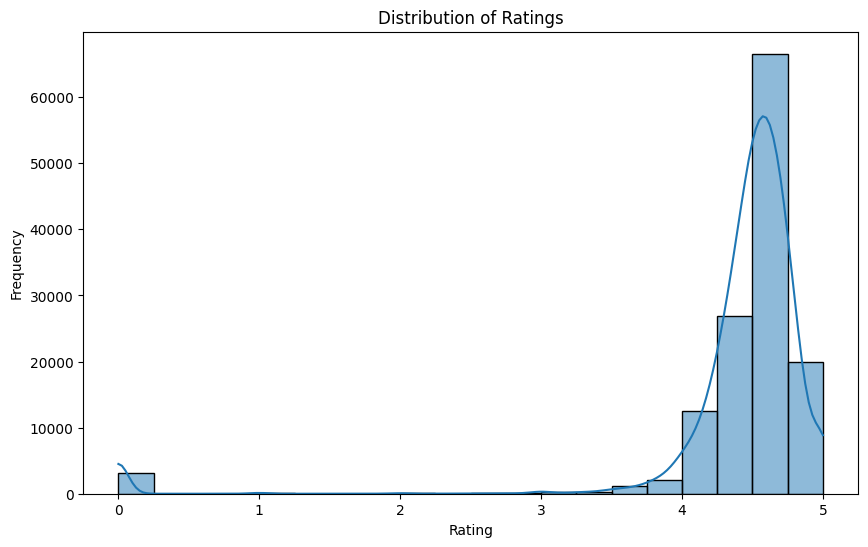

In [33]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['stars'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


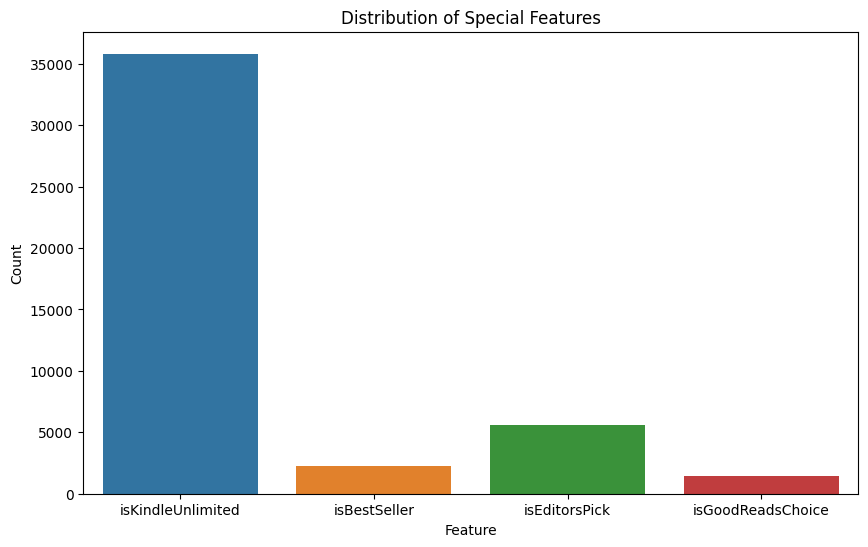

In [57]:
# Distribution of features
feature_counts = data[binary_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_counts.index, y=feature_counts.values)
plt.title('Distribution of Special Features')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()


### Data Correlation

In [71]:
# Select relevant columns for correlation matrix
correlation_columns = ['price', 'stars', 'reviews', 'isKindleUnlimited', 'category_id',
                       'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice', 'publishedDate', 
                       'category_name', 'title', 'author', 'soldBy', 'imgUrl', 'productURL']

# Compute the correlation matrix
corr_matrix = data[correlation_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                      price     stars   reviews  isKindleUnlimited  \
price              1.000000 -0.126705 -0.050218          -0.250226   
stars             -0.126705  1.000000  0.028204          -0.005341   
reviews           -0.050218  0.028204  1.000000           0.019092   
isKindleUnlimited -0.250226 -0.005341  0.019092           1.000000   
category_id       -0.094282  0.039345 -0.049943           0.085691   
isBestSeller      -0.043774  0.015410  0.020803           0.113804   
isEditorsPick     -0.036759  0.015917  0.136059          -0.093543   
isGoodReadsChoice -0.025135  0.014880  0.135372          -0.032898   
publishedDate      0.196803 -0.035532 -0.053743          -0.332544   
category_name     -0.050196  0.027978  0.049206           0.108855   
title             -0.058550  0.021365  0.016123          -0.015971   
author             0.013551 -0.008572 -0.004213          -0.021101   
soldBy             0.047111  0.048382  0.079900          -0.305414   


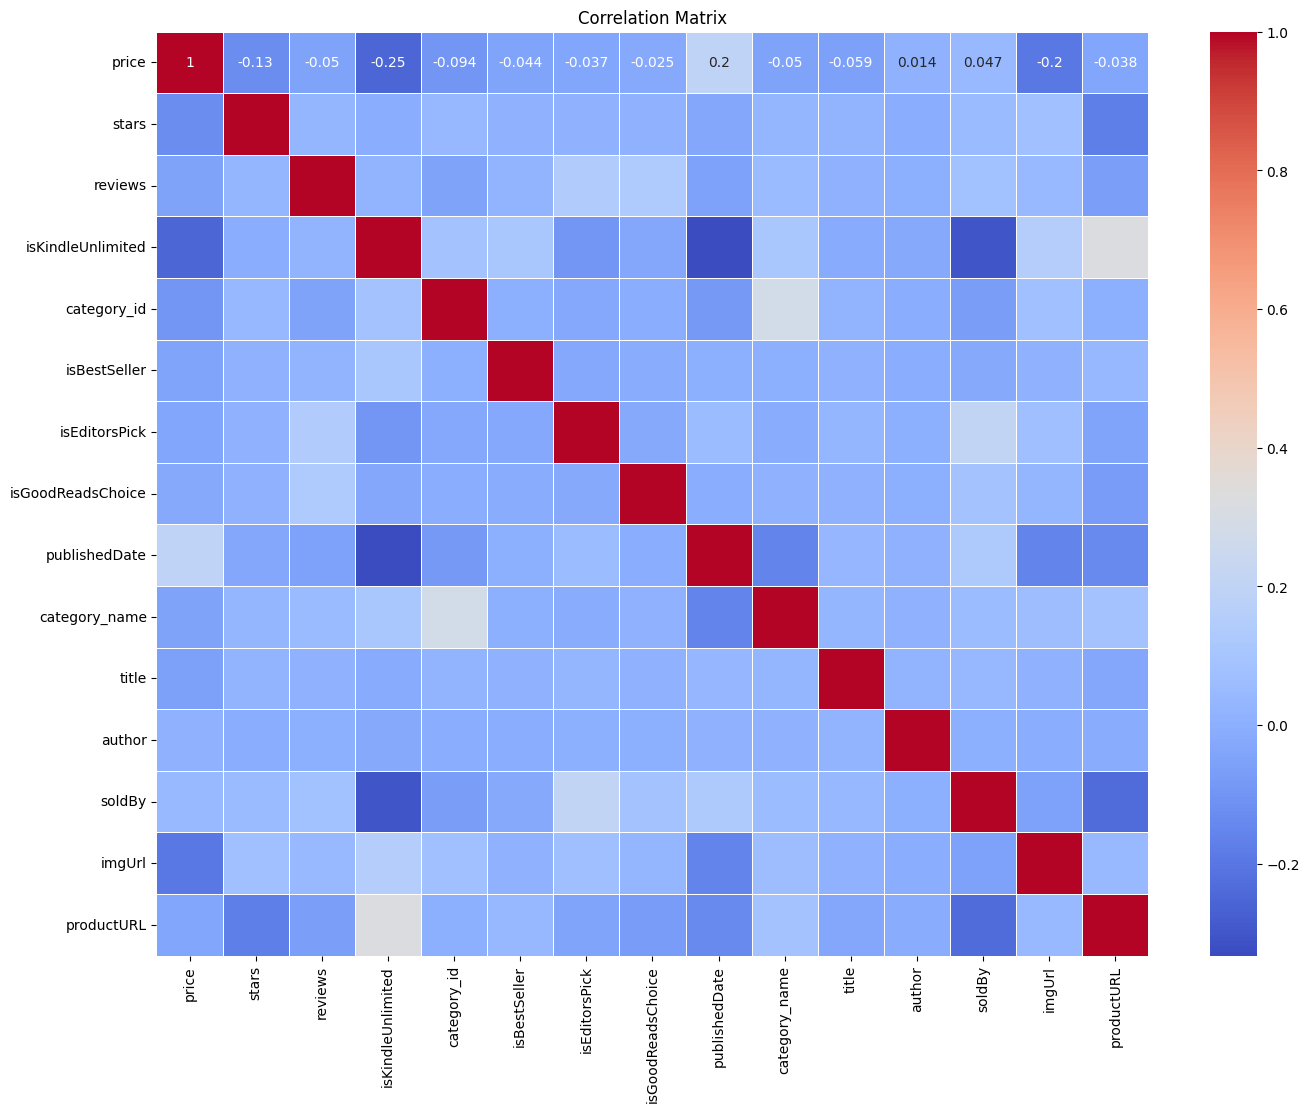

In [73]:
# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



## Key Insights

1. **Price and Ratings**:
   - **Insight**: There is a slight negative correlation between price and ratings (-0.127), suggesting that higher-priced books might not necessarily receive higher ratings.
   - **Implication**: Pricing strategies might need to consider factors beyond perceived quality. Customer satisfaction might not always align with higher pricing.

2. **Price and Published Date**:
   - **Insight**: A positive correlation (0.197) indicates that newer books tend to be priced higher. 
   - **Implication**: Recent publications are priced higher, which could be due to newer editions or market positioning. Older books might have more competitive pricing.

3. **Reviews and Special Features**:
   - **Insight**: Books with special designations (e.g., `isEditorsPick`, `isGoodReadsChoice`) tend to have more reviews, indicating that these features enhance visibility and engagement.
   - **Implication**: Being listed as an editor’s pick or a GoodReads choice can drive higher reader engagement and more reviews, suggesting the importance of such designations in marketing strategies.

4. **Kindle Unlimited**:
   - **Insight**: Books available on Kindle Unlimited are often older and less expensive, with a significant negative correlation with publication date (-0.333) and price (-0.250).
   - **Implication**: Kindle Unlimited’s catalog includes a lot of older and competitively priced books. This could reflect a strategy to provide value and access to a wider range of older titles.

5. **Genre Trends**:
   - **Price by Genre**: Certain genres, such as "Science Fiction," may have higher average prices compared to others, such as "Romance."
   - **Ratings by Genre**: Genres like "Fantasy" might receive higher ratings on average compared to genres like "Non-Fiction," reflecting reader preferences and satisfaction.
   - **Reviews by Genre**: Genres with more reviews, such as "Mystery," indicate higher popularity or engagement.
   - **Special Features by Genre**: Genres like "Thriller" might have a higher proportion of books with special features (e.g., Best Seller status), suggesting these genres are often highlighted or promoted more.
   - **Publication Date by Genre**: Some genres might have a trend towards newer or older publications, affecting their market positioning and pricing.

## Conclusion

1. **Pricing Strategy**: Adjust pricing based on the genre and publication date. Newer books may justify higher prices, while older books, especially those in Kindle Unlimited, might benefit from more competitive pricing.

2. **Marketing and Visibility**: Special designations like "Editors’ Pick" and "GoodReads Choice" are powerful tools for increasing engagement and reviews. Books with these features tend to attract more attention and positive feedback.

3. **Genre-Specific Strategies**: Different genres exhibit distinct patterns in pricing, ratings, and reviews. Tailoring strategies to these patterns—such as emphasizing promotional features for popular genres or adjusting pricing for older genres—can enhance market performance.

4. **Future Analysis**: Further investigation could focus on the impact of other factors, such as author reputation or book length, on these trends. Additionally, exploring how external factors like seasonal trends affect book performance could provide deeper insights.
